# XGBoost

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, make_scorer, f1_score

#### Read data

In [17]:
df = pd.read_csv('../../../datasets/parte2/treino/dataset_prepared.csv', na_filter=False)

In [18]:
replace_map = {'None':0, 'Low':1, 'Medium':2, 'High':3, 'Very High':4}

df['injection'] = df['injection'].replace(replace_map).astype(int)

#### X and y arrays

In [19]:
X = df.drop(['injection'], axis=1)
y = df['injection']

#### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023, stratify=y)

#### Training 

Using GridSearchCV to find the best hyperparameters

In [21]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4],
    #'min_child_weight': [5, 6, 7],
    #'colsample_bytree': [0.7, 0.8, 0.9], # 0 ou 0,2 ou 0.7
    #'subsample': [0.7, 0.8, 0.9],
    #'gamma': [0.5, 1, 1.5, 2, 5],
}

model = XGBClassifier(random_state=2023)

f1_scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, refit=True, cv=15, verbose=3, n_jobs=-1, error_score="raise") # scoring='f1'
grid_search.fit(X_train, y_train)


Fitting 15 folds for each of 24 candidates, totalling 360 fits
[CV 5/15] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.864 total time=   0.8s
[CV 2/15] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.878 total time=   0.9s
[CV 4/15] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.866 total time=   0.9s
[CV 1/15] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.869 total time=   0.9s
[CV 7/15] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.849 total time=   0.8s
[CV 3/15] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.878 total time=   0.9s
[CV 6/15] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.847 total time=   0.9s
[CV 8/15] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.877 total time=   1.0s
[CV 9/15] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.864 total time=   0.7s
[CV 12/15] END learning_rate=0.01, max_depth=3, n_estimators=100

GridSearchCV(cv=15, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2023, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=3)

Inspect the best parameters

In [22]:
grid_search.best_params_ # Melhor : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}

In [23]:
grid_search.best_score_ # Melhor : 0.8828894705820277 -> 20% | 0.8818555405468975 -> 30 % | 0.8821124810057649 -> 25 %

0.8942352636682157

Get the best estimator

In [24]:
model = grid_search.best_estimator_

Get the predictions using the trained model

In [25]:
predictions = model.predict(X_test)

#### Model Evaluation

Classification report

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1556
           1       0.52      0.31      0.39        86
           2       0.66      0.71      0.69       220
           3       0.75      0.73      0.74       221
           4       0.81      0.85      0.83       121

    accuracy                           0.90      2204
   macro avg       0.74      0.72      0.72      2204
weighted avg       0.89      0.90      0.89      2204



Accuracy Score

In [27]:
accuracy_score(y_test, predictions) # Melhor : 0.8906533575317604 -> 20 % | 0.886232980332829 -> 30 % | 0.8892519970951344 -> 25 % | Binary : 0.8907044299201162 -> 25%

0.897005444646098

Confusion Matrix

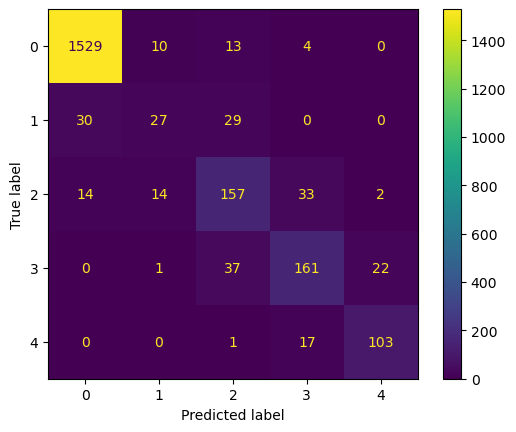

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

In [29]:
df_test = pd.read_csv('../../../datasets/parte2/teste/dataset_prepared.csv')
predictions_teste = model.predict(df_test)

In [30]:
df_predictions = pd.DataFrame({'Result': predictions_teste})
df_predictions['RowId'] = range(1, len(predictions_teste) + 1)
df_predictions = df_predictions[['RowId', 'Result']]

replace_map = { 0:'None', 1:'Low', 2:'Medium', 3:'High', 4:'Very High'} 

df_predictions['Result'] = df_predictions['Result'].replace(replace_map)

df_predictions.to_csv('../../../datasets/parte2/teste/kaggle-xgboost-cv10-wdescription-75-stratified-binary.csv', index=False)